In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
model.load_weights('../input/vggfaceweights/vgg_face_weights.h5')

In [ ]:
def preprocess_image(image_path):
    img = load_img(image_path,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    return img

def find_cosine_similarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation),test_representation)
    b = np.sum(np.multiply(source_representation,source_representation))
    c = np.sum(np.multiply(test_representation,test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

vgg_face_descriptor = Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

In [ ]:
epsilon = 0.4

def verify_face(img1, img2):
    img1_representation = vgg_face_descriptor.predict(preprocess_image(img1))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image(img2))[0,:]
    cosine_similarity = find_cosine_similarity(img1_representation,img2_representation)
    
    f = plt.figure()
    f.add_subplot(1,2,1)
    plt.imshow(image.load_img(img1))
    plt.xticks([]);plt.yticks([])
    f.add_subplot(1,2,2)
    plt.imshow(image.load_img(img2))
    plt.xticks([]);plt.yticks([])
    plt.show(block=True)
    
    print("Cosine similarity: ",cosine_similarity)
    
    if(cosine_similarity < epsilon):
        print("They are same person")
    else:
        print("They are not same person!")

2023-01-10 08:31:03.204738: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-10 08:31:03.969329: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


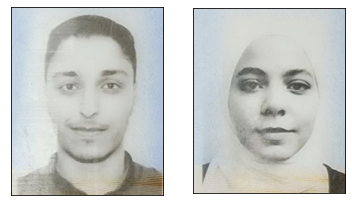

Cosine similarity:  0.45216697454452515
They are not same person!


In [ ]:
verify_face("/kaggle/input/idfaces/faces/f03.jpg","/kaggle/input/idfaces/faces/f01.jpg")

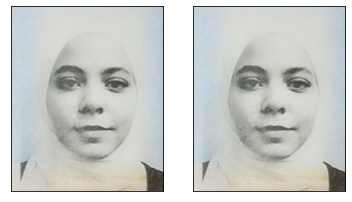

Cosine similarity:  -1.1920928955078125e-07
They are same person


In [ ]:
verify_face("/kaggle/input/idfaces/faces/f01.jpg","/kaggle/input/idfaces/faces/f01.jpg")